<a href="https://colab.research.google.com/github/Aquinate22/TSF-Task-002/blob/main/Task_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation - Data Science & Business Analytics Internship.**


# Prediction using unsupervised Machine Learning



 ## **Task 2:** Predict the optimum number of clusters and represent it visually.

## **Author:** Mitchelle Okubasu.

## **Introduction - Unsupervised Machine Learning.**


**Clustering** is an unsupervised Machine Learning technique that groups unlabeled data points based on their similarities and differences. Common Clustering algorithms include **K-Means** and **hierarchical clustering**.



KMeans clustering is used when we have unlabelled data which is data without defined categories or groups. We use KMeans to find intrinsic groups within a dataset and assign each data point to one of the K groups based on the features that are providedin the dataset.

NB: K is the number of clusters

To find the number of clusters in the data, we need to run the KMeans clustering algorithm for different values of K and compare the results.
We should then choose the optimum value of K that gives us the best performance.

In this task, we will use the **Elbow method** to find the optimum value of K. The Elbow method plots the value of cost function produced by different values of K.
The improvement in the average distortion will decline as K increases.

The value of K at which improvement in destortion will decline the most is called the elbow.This indicates that we should stop dividing the data into further clusters.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

%matplotlib inline

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10) # data preview

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## E.D.A

In [3]:
# Checking the shape of the dataset
iris_df.shape

(150, 4)

The dataset contains 150 instances and 4 attributes

In [4]:
# Checking the summary of the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


From the non-null count, we can see that there are no missing values.

In [5]:
# Statistical Summary of the data
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


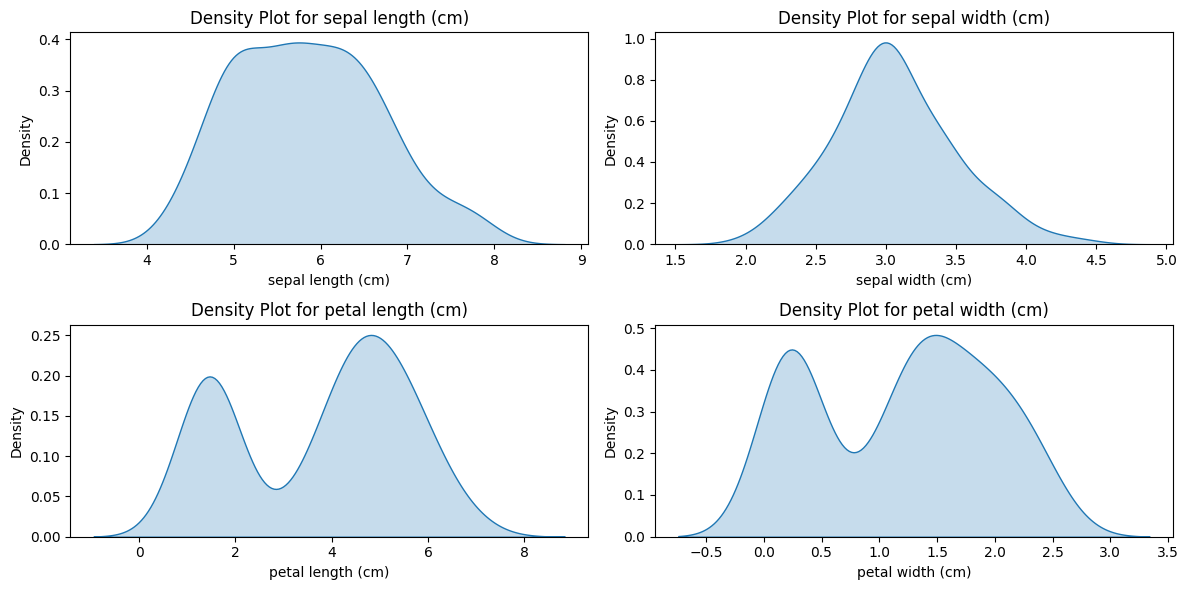

In [6]:
# Creating a grid of density subplots to observe the distribution of variables in the dataset
plt.figure(figsize=(12, 6))

# Loop through each column in the dataset and create a density plot
for i, column in enumerate(iris_df.columns):
    plt.subplot(2, len(iris_df.columns)//2, i + 1)
    sns.kdeplot(iris_df[column], fill=True)
    plt.title(f'Density Plot for {column}')

plt.tight_layout()
plt.show()


## Modeling

In [7]:
# Set X to be equal to Iris_df
X = iris_df.iloc[:, [0, 1, 2, 3]].values


In [8]:
# KMeans model with 2 clusters ie K=2

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

## Model fiting and Evaluation

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have your data in a variable "data"

# Create and fit K-means models with different values of K
k_values = [2, 3, 4, 5]  # You can choose a range of K values to evaluate
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the best K based on the highest Silhouette Score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

print(f"Best K: {best_k}, Silhouette Score: {max(silhouette_scores)}")


Best K: 2, Silhouette Score: 0.6810461692117462


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


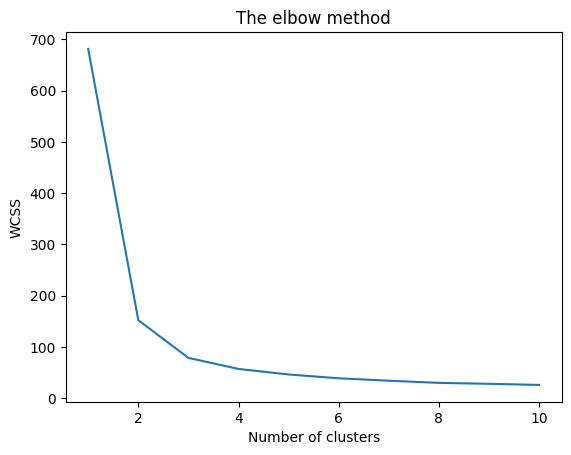

In [10]:
# Finding the optimum number of clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph,
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [11]:
# Applying kmeans to the dataset using K = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

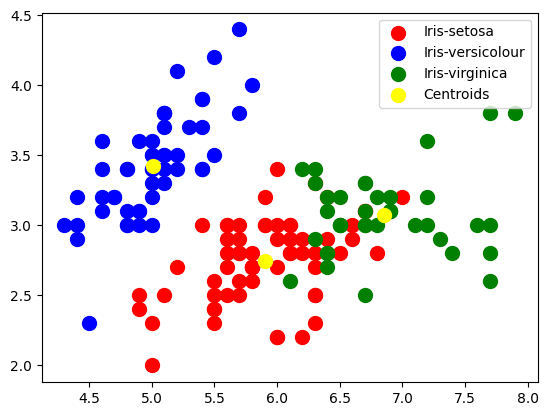

In [13]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()